# Imports

In [ ]:
import pandas as pd
from constants import LABEL_COLUMN, TEXT_COLUMN, ALPHABET_COLUMN, ID_COLUMN, USAGE_COLUMN, TRAINING_DATA_PATH, EMBEDDING_SIZE, ALPHABETS
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

df = pd.read_csv(TRAINING_DATA_PATH)


## General information on the data set

In [ ]:
# Replace label NaN with the string "nan" (the string "nan" is interpreted as a NaN value by pandas)
df[LABEL_COLUMN].replace(to_replace=np.nan, value="nan", inplace=True)

print(df.info())

print("Number of distinct classes : ", df[LABEL_COLUMN].nunique())
print("Some examples of the data set \n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38854 entries, 0 to 38853
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      38854 non-null  int64 
 1   Usage   38854 non-null  object
 2   Text    38854 non-null  object
 3   Label   38854 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None
Nombre de classes différentes :  390
Exemples présents dans le dataset 
     ID   Usage                                               Text Label
0  136  Public  Finalment  Atena le recibe en l'acropoli d'Ate...   arg
1   62  Public  Jane Laffort fille de Joseph Laffort et d' Ang...   lat
2   74  Public  Сонзэ ялаксонзо  - Роджер Джозеф Бошкович  - у...   myv
3   40  Public  Mɛniɛ nkùɔ dìì mɔ̀nnì bɛnìtìbɛ̀ kɛ́deè  kɛ̀ Nɔ...   tbz
4   30  Public  Ka go dirisa thekniki yeo ya phetogonepiso  Le...   tsn


C:\Users\Hugo\AppData\Local\Temp\ipykernel_31504\1640806974.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Label"].replace(to_replace=np.nan, value="nan", inplace=True)


In [ ]:
print("Number of distinct IDs: ", df[ID_COLUMN].nunique())
print("Number of distinct Usage: ", df[USAGE_COLUMN].nunique())
print("Number of distinct Texts: ", df[TEXT_COLUMN].nunique())

Nombre d'ID différents :  80
Nombre de Usage différents :  1
Nombre de Text différents :  38852


## Top 10 classes and their distribution

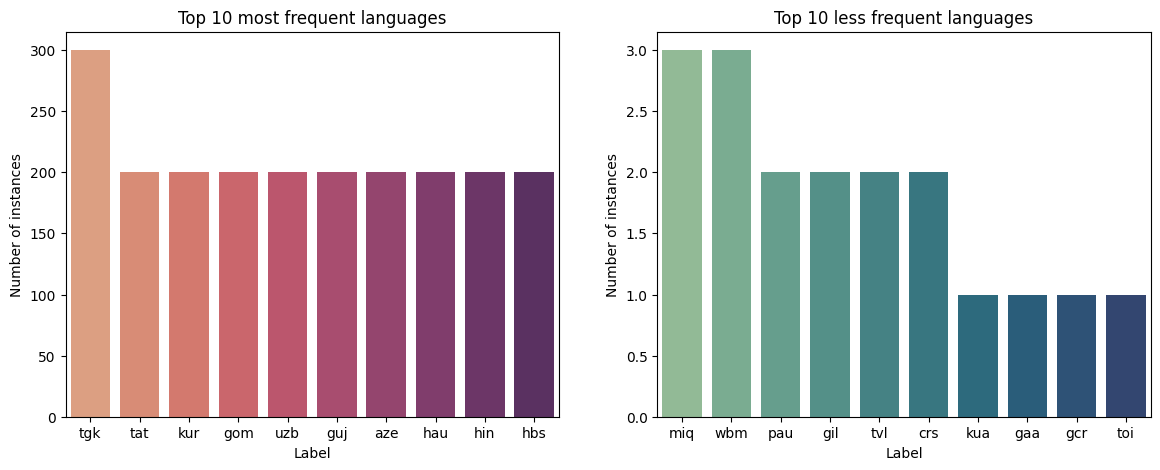

In [ ]:
# Count the number of instances per class
classe_counts = df[LABEL_COLUMN].value_counts()

# Select the 10 most frequent classes
top_10_classes = classe_counts.head(10)

# Select the 10 less frequent classes
bottom_10_classes = classe_counts.tail(10)

# Create the figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Display the 10 most frequent classes
sns.barplot(x=top_10_classes.index, y=top_10_classes.values, ax=axes[0], hue=top_10_classes.index, palette="flare")
axes[0].set_title("Top 10 most frequent languages")
axes[0].set_ylabel("Number of instances")

# Display the 10 less frequent classes
sns.barplot(x=bottom_10_classes.index, y=bottom_10_classes.values, ax=axes[1], hue=bottom_10_classes.index, palette="crest")
axes[1].set_title("Top 10 less frequent languages")
axes[1].set_ylabel("Number of instances")

# Display the plot
plt.show()

## Distribution of languages per number of instances

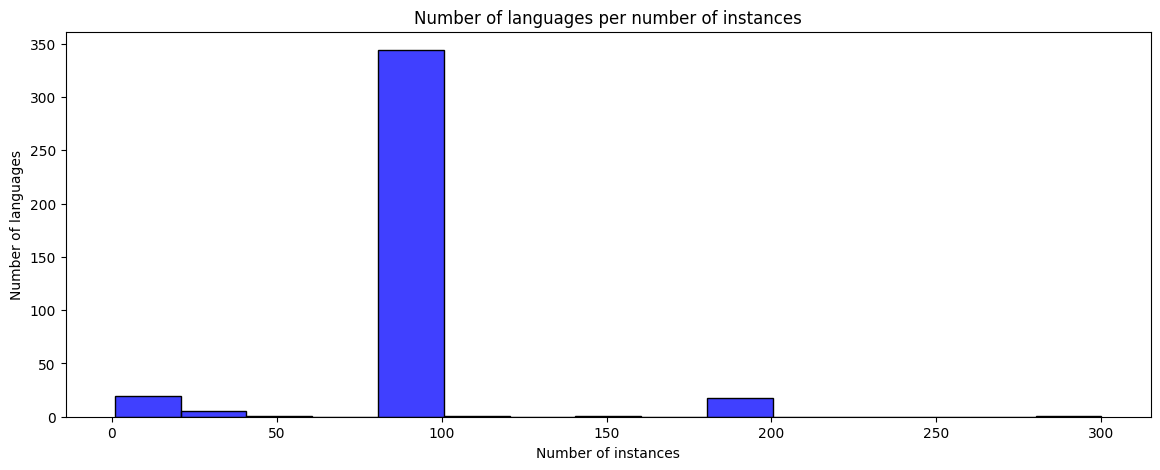

In [ ]:
# Graph of the number of languages per slice of 50 instances (histogram)
plt.figure(figsize=(14, 5))
sns.histplot(classe_counts, stat="count", binwidth=20, color="blue")
plt.title("Number of languages per number of instances")
plt.xlabel("Number of instances")
plt.ylabel("Number of languages")
plt.show()

# Data representation

## Detection of alphabets

In [ ]:
def detect_alphabet(text):
    """Detect the alphabet of a text."""
    detected = ""
    
    for char in text:
        char_code = ord(char)
        
        for alphabet, (start, end) in ALPHABETS.items():
            if start <= char_code <= end:
                detected = alphabet
    
    return detected if detected else "Unknown"

# ======= TESTS =======
texts = [
    "Hello, how are you?",  # Latin
    "Привет, как дела?",  # Cyrillique
    "مرحبا كيف حالك؟",  # Arabe
    "שלום מה שלומך?",  # Hébreu
    "你好，你怎么样？",  # Chinois
    "こんにちは、元気ですか？",  # Japonais (Hiragana & Kanji)
    "안녕하세요, 어떻게 지내세요?",  # Coréen
    "Γεια σας, πώς είστε;",  # Grec
    "नमस्ते, आप कैसे हैं?",  # Devanagari (Hindi)
    "สวัสดีคุณเป็นอย่างไรบ้าง",  # Thaï
]

for text in texts:
    print(f"Text: {text}")
    print(f"Detected alphabet: {detect_alphabet(text)}")
    print("-" * 50)


Texte: Hello, how are you?
Alphabet détecté: Latin
--------------------------------------------------
Texte: Привет, как дела?
Alphabet détecté: Cyrillic
--------------------------------------------------
Texte: مرحبا كيف حالك؟
Alphabet détecté: Arabic
--------------------------------------------------
Texte: שלום מה שלומך?
Alphabet détecté: Hebrew
--------------------------------------------------
Texte: 你好，你怎么样？
Alphabet détecté: Chinese
--------------------------------------------------
Texte: こんにちは、元気ですか？
Alphabet détecté: Hiragana
--------------------------------------------------
Texte: 안녕하세요, 어떻게 지내세요?
Alphabet détecté: Korean
--------------------------------------------------
Texte: Γεια σας, πώς είστε;
Alphabet détecté: Greek
--------------------------------------------------
Texte: नमस्ते, आप कैसे हैं?
Alphabet détecté: Devanagari
--------------------------------------------------
Texte: สวัสดีคุณเป็นอย่างไรบ้าง
Alphabet détecté: Thai
-----------------------------------------

## Identify language with alphabet

In [ ]:
df = pd.read_csv("data/train_data_with_embedding_per_column.csv")
df[ALPHABET_COLUMN] = df[TEXT_COLUMN].apply(detect_alphabet)
# Replace label NaN with the string "nan" (the string "nan" is interpreted as a NaN value by pandas)
df[LABEL_COLUMN].replace(to_replace=np.nan, value="nan", inplace=True)

## PCA approach per alphabet

<Axes: xlabel='PCA1', ylabel='PCA2'>

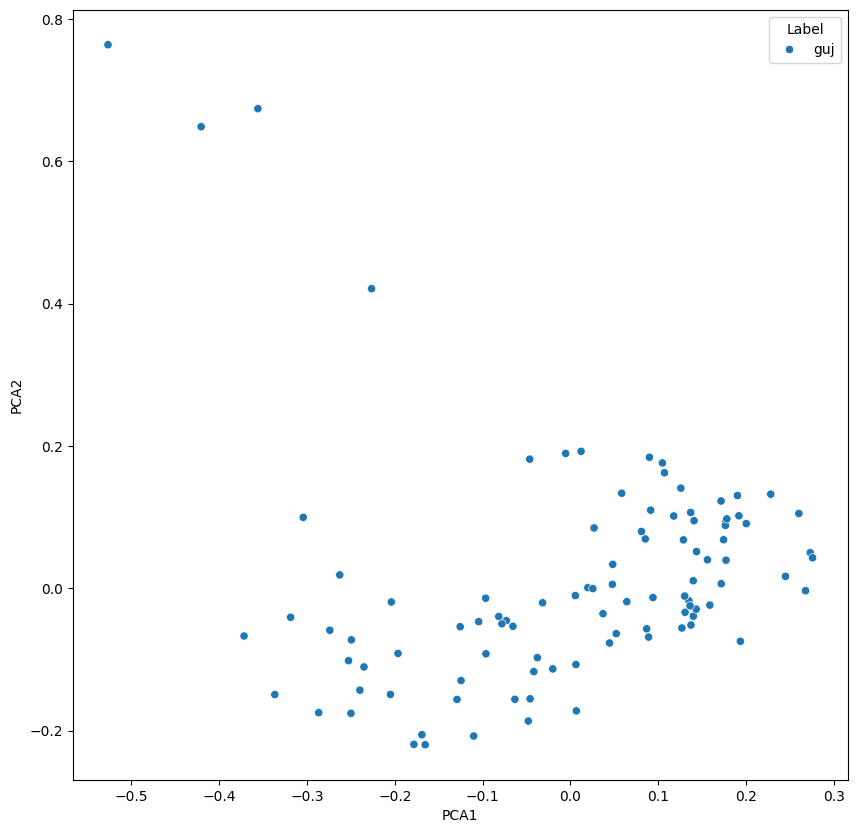

In [ ]:
# PCA method to analyze the distributions of embeddings according to the labels
from sklearn.decomposition import PCA

chosen_alphabet = "Gujarati"

pca = PCA(n_components=2)

# Fit PCA on the training DataFrame and transform the data
train_vector_embedded = pca.fit_transform(df[[f"embedding_{i}" for i in range(EMBEDDING_SIZE)]])

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=train_vector_embedded, columns=["PCA1", "PCA2"])
pca_df[LABEL_COLUMN] = df[LABEL_COLUMN]
pca_df[ALPHABET_COLUMN] = df[ALPHABET_COLUMN]
pca_df = pca_df[pca_df[ALPHABET_COLUMN] == chosen_alphabet]

# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue=LABEL_COLUMN, palette="tab10")

## TSNE approach per alphabet

<Axes: xlabel='T-SNE1', ylabel='T-SNE2'>

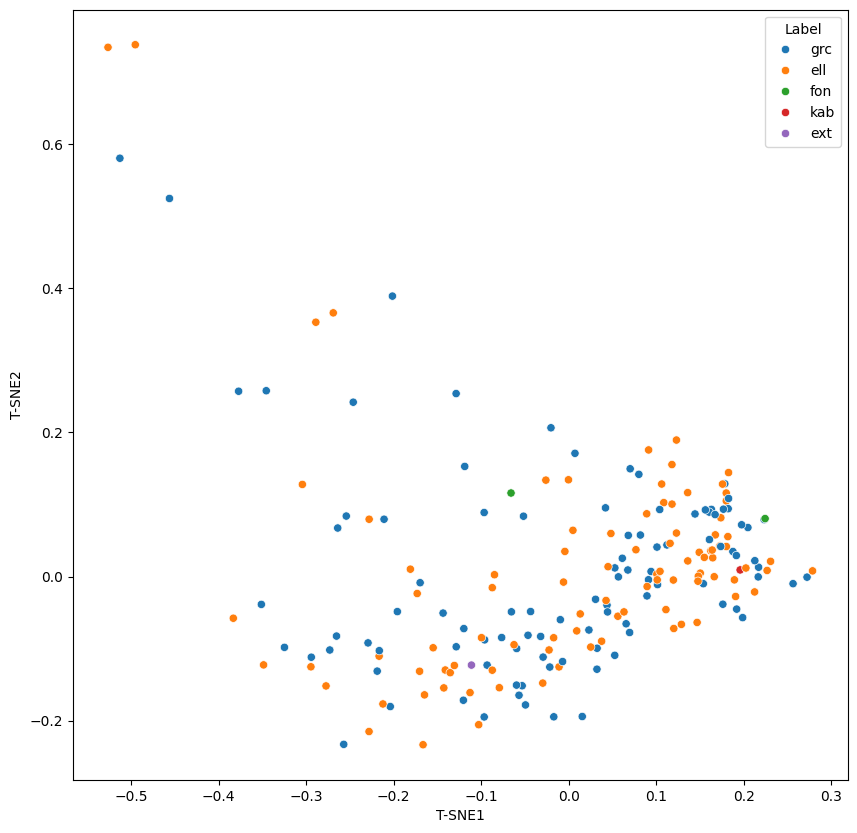

In [10]:
from sklearn.manifold import TSNE


chosen_alphabet = "Greek"

# Appliquer t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

X_embedded = tsne.fit_transform(df[[f"embedding_{i}" for i in range(EMBEDDING_SIZE)]])

#Create a new DataFrame with the PCA results
tsne_df = pd.DataFrame(data=train_vector_embedded, columns=["T-SNE1", "T-SNE2"])
tsne_df[LABEL_COLUMN] = df[LABEL_COLUMN]
tsne_df[ALPHABET_COLUMN] = df[ALPHABET_COLUMN]
tsne_df = tsne_df[tsne_df[ALPHABET_COLUMN] == chosen_alphabet]

#Create a scatter plot of the PCA results
plt.figure(figsize=(10, 10))
sns.scatterplot(data=tsne_df, x="T-SNE1", y="T-SNE2", hue=LABEL_COLUMN, palette="tab10")

Conclusion : the data cannot be grouped easily into clusters, two dimensions may not be sufficient to seperate data. 
However, we observe that some alphabets contain few languages

In [20]:
for alphabet in ALPHABETS:
    # Print the unique labels per alphabet
    labels_per_alphabet = df[df["Alphabet"] == alphabet][LABEL_COLUMN]
    if len(labels_per_alphabet.unique()) < 6:
        print(f"Alphabet: {alphabet}")
        print(labels_per_alphabet.unique())
        print("-" * 50)

Alphabet: Hebrew
['yid' 'heb' 'hbo']
--------------------------------------------------
Alphabet: Hiragana
['jpn']
--------------------------------------------------
Alphabet: Katakana
['jpn' 'cbk']
--------------------------------------------------
Alphabet: Korean
['kor' 'rmy']
--------------------------------------------------
Alphabet: Greek
['grc' 'ell' 'fon' 'kab' 'ext']
--------------------------------------------------
Alphabet: Gujarati
['guj']
--------------------------------------------------
Alphabet: Thai
['tha']
--------------------------------------------------
Alphabet: Georgian
['xmf' 'kat']
--------------------------------------------------


We can realize the following associations:
 - Thai -> "tha"
 - Hiragana -> jpn
 - Gujarati -> 'guj'
Some labels only have one occurence inside an alphabet, we can then add the following associations:
- "Korean" -> "kor"
- "Katana" -> "jpn"  


# Detection model of language for alphabet with less than 5 languages

In [6]:
SMALL_ALPHABETS = ["Hebrew", "Greek", "Georgian"]

In [7]:
# Replace label NaN with the string "nan" (the string "nan" is interpreted as a NaN value by pandas)
df["Label"].replace(to_replace=np.nan, value="nan", inplace=True)

# Keep only labels with multiple occurrences
df = df[df[LABEL_COLUMN].isin(df[LABEL_COLUMN].value_counts()[df[LABEL_COLUMN].value_counts() > 1].index)]


C:\Users\camil\AppData\Local\Temp\ipykernel_12508\2923453103.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Label"].replace(to_replace=np.nan, value="nan", inplace=True)


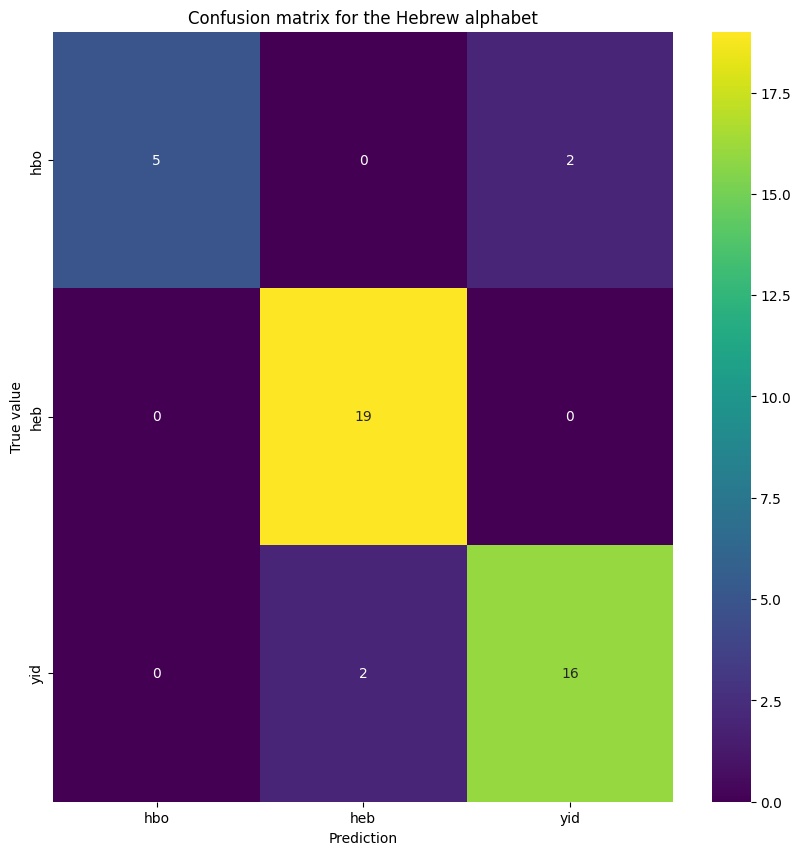

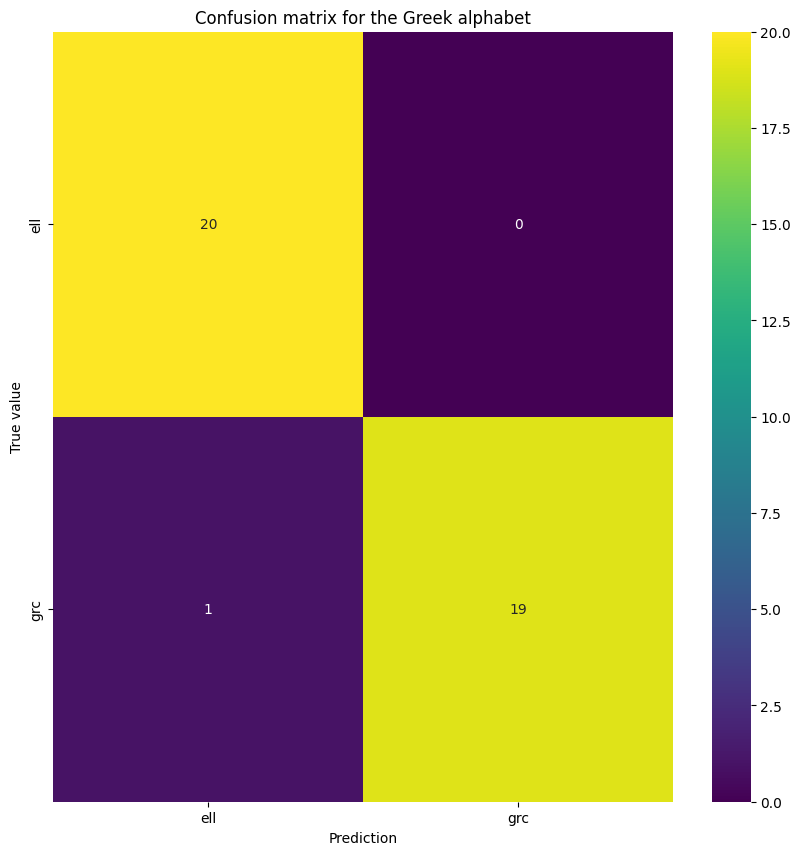

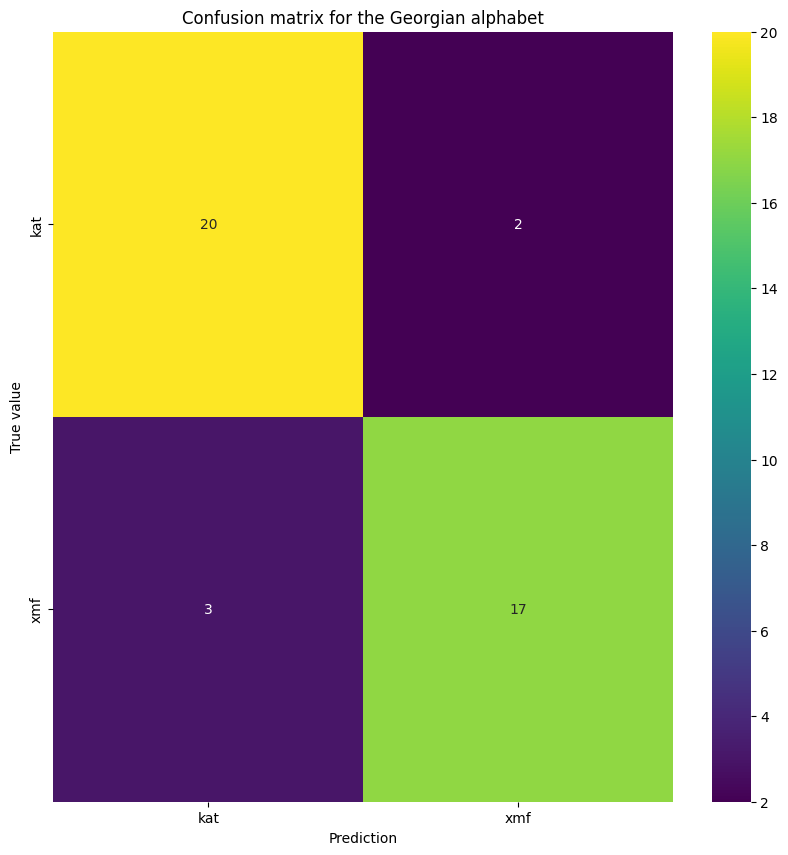

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Separating the data into training and testing data
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df[LABEL_COLUMN], random_state=42)

for small_alphabet in SMALL_ALPHABETS:

    df_train_small = df_train[df_train[ALPHABET_COLUMN] == small_alphabet]
    df_test_small = df_test[df_test[ALPHABET_COLUMN] == small_alphabet]

    # Eliminate labels present in one set and not in the other
    # This step is necessary because some labels may be underrepresented within an alphabet
    train_labels = df_train_small[LABEL_COLUMN].unique()
    test_labels = df_test_small[LABEL_COLUMN].unique()
    common_labels = set(train_labels).intersection(test_labels)

    df_train_small = df_train_small[df_train_small[LABEL_COLUMN].isin(common_labels)]
    df_test_small = df_test_small[df_test_small[LABEL_COLUMN].isin(common_labels)]
    classifier = RandomForestClassifier()
    classifier.fit(df_train_small[[f"embedding_{i}" for i in range(EMBEDDING_SIZE)]], df_train_small[LABEL_COLUMN])

    y_pred = classifier.predict(df_test_small[[f"embedding_{i}" for i in range(EMBEDDING_SIZE)]])
    cm = confusion_matrix(df_test_small[LABEL_COLUMN], y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=classifier.classes_, yticklabels=classifier.classes_)
    plt.xlabel("Prediction")
    plt.ylabel("True value")
    plt.title(f"Confusion matrix for the {small_alphabet} alphabet")
    plt.show()

